# Malaria detection in RBCs  
  
  
Malaria is a deadly, infectious, mosquito-borne disease caused by Plasmodium parasites that are transmitted by the bites of infected female Anopheles mosquitoes. There are five parasites that cause malaria, but two types—P. falciparum and P. vivax—cause the majority of the cases. 
  
There are several methods that can be used for malaria detection and diagnosis. Some methods include polymerase chain reaction (PCR) and rapid diagnostic tests (RDT). These two tests are typically used where high-quality microscopy services are not readily available. According to WHO protocol, diagnosis typically involves intensive examination of the blood smear at 100X magnification. Trained people manually count how many red blood cells contain parasites out of 5,000 cells.  
  
Manual diagnosis of blood smears is an intensive manual process that requires expertise in classifying and counting parasitized and uninfected cells. This process may not scale well, especially in regions where the right expertise is hard to find. 
Deep learning models, or more specifically convolutional neural networks (CNNs), have proven very effective in a wide variety of computer vision tasks. Furthermore, once trained, they are also highly scalable. 
  
Hence, malaria detection could benefit from automation through deep learning.

In [1]:
import os
import warnings
import random
import shutil  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# train-test split
# to be run only once
root_dir = 'cell_images'
class_dirs = ['Parasitized','Uninfected']

'''
train_path = os.path.join('data','train')  
test_path = os.path.join('data','test')

test_ratio = 0.10

for class_dir in class_dirs:
    # create directories
    os.makedirs(os.path.join(train_path,class_dir))
    os.makedirs(os.path.join(test_path,class_dir))
    # shuffle images
    src = os.path.join(root_dir,class_dir) 
    file_list = os.listdir(src)
    random.shuffle(file_list)
    threshold = int(len(file_list) * (1 - test_ratio))
    train_files, test_files = file_list[0:threshold], file_list[threshold:]
    # append path to file names
    train_files = [os.path.join(src,name) for name in train_files]
    test_files = [os.path.join(src,name) for name in test_files]
    # Copy-pasting images
    for name in train_files:
        shutil.copy(name, os.path.join(train_path,class_dir))
    for name in test_files:
        shutil.copy(name, os.path.join(test_path,class_dir))
    
    print(f'Total {class_dir} images: ', len(file_list))
    print('Training: ', len(train_files))
    print('Testing: ', len(test_files))
    print()
    ''';

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_path = os.path.join('data','train')  
test_path = os.path.join('data','test')
train_datagen = ImageDataGenerator(rescale=1./255,
                            validation_split=0.1,
                            rotation_range=30,
                            zoom_range=0.15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            horizontal_flip=True,
                            fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_gen = train_datagen.flow_from_directory(directory=train_path,
                                              target_size=(120,120),
                                              batch_size=32,
                                              shuffle=True,
                                              class_mode='binary',
                                              subset='training')

val_gen = train_datagen.flow_from_directory(directory=train_path,
                                            target_size=(120,120),
                                            batch_size=32, 
                                            shuffle=True,
                                            class_mode='binary',
                                            subset='validation')

test_gen = test_datagen.flow_from_directory(directory=test_path,
                                            target_size=(120,120),
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode='binary')
classes = ['Parasitized','Uninfected']

Found 22322 images belonging to 2 classes.
Found 2480 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [5]:
print(f'No. of pixels in a single image: {120*120*3}')
print(f'No. of training batches: {len(train_gen)}')
print(f'No. of validation batches: {len(val_gen)}')
print(f'No. of testing batches: {len(test_gen)}')

No. of pixels in a single image: 43200
No. of training batches: 698
No. of validation batches: 78
No. of testing batches: 87


Exploring the images

In [6]:
import random
random_seed=33
# To help reduce memory usage
import gc
import time
def cleanup():
    gc.collect()
    time.sleep(10)

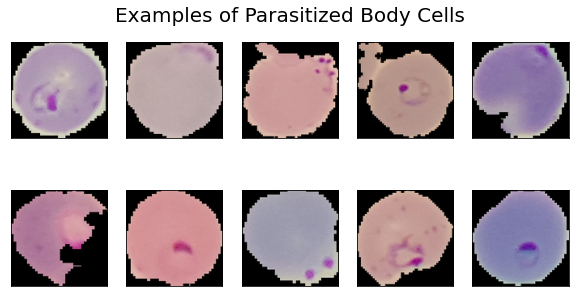

In [7]:
'''
root_dir = 'cell_images'
class_dirs = ['Parasitized','Uninfected']
'''
from PIL import Image
import os
from tqdm import tqdm_notebook

images_address=os.listdir(os.path.join(root_dir,class_dirs[0]))
images_address.remove('Thumbs.db')
parasitized_data=np.zeros((len(images_address),120,120,3),dtype=np.int16)

for ind,img_address in tqdm_notebook(enumerate(images_address),total=len(images_address)):
    img=Image.open(os.path.join(root_dir,class_dirs[0],img_address))
    img=img.resize((120,120),Image.ANTIALIAS)
    img=np.asarray(img)
    img=img.astype(np.int16)
    parasitized_data[ind]=img
cleanup()

np.random.seed(random_seed)
random_10=np.random.randint(0,parasitized_data.shape[0],size=10)
fig=plt.figure(figsize=(10,5))
plt.title("Examples of Parasitized Body Cells",fontsize=20)
plt.axis('off')
for ind,rand in enumerate(random_10):
    ax_n=fig.add_subplot(2,5,ind+1)
    ax_n.imshow(parasitized_data[rand])
    ax_n.get_xaxis().set_visible(False)
    ax_n.get_yaxis().set_visible(False)
plt.show()

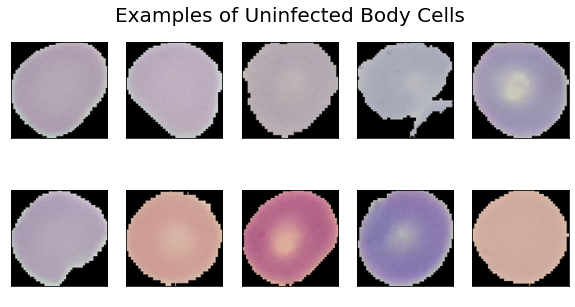

In [8]:
images_address=os.listdir(os.path.join(root_dir,class_dirs[1]))
images_address.remove('Thumbs.db')
uninfected_data=np.zeros((len(images_address),120,120,3),dtype=np.int16)

for ind,img_address in tqdm_notebook(enumerate(images_address),total=len(images_address)):
    img=Image.open(os.path.join(root_dir,class_dirs[1],img_address))
    img=img.resize((120,120),Image.ANTIALIAS)
    img=np.asarray(img)
    img=img.astype(np.int16)
    uninfected_data[ind]=img
cleanup()

np.random.seed(random_seed)
random_10=np.random.randint(0,uninfected_data.shape[0],size=10)
fig=plt.figure(figsize=(10,5))
plt.title("Examples of Uninfected Body Cells",fontsize=20)
plt.axis('off')
for ind,rand in enumerate(random_10):
    ax_n=fig.add_subplot(2,5,ind+1)
    ax_n.imshow(uninfected_data[rand])
    ax_n.get_xaxis().set_visible(False)
    ax_n.get_yaxis().set_visible(False)
plt.show()

In [9]:
# Libraries for CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
import logging
tf.get_logger().setLevel(logging.ERROR)

In [10]:
model = Sequential()

# convolution & pooling layers
model.add(Conv2D(16, (3,3), padding='same',activation=tf.nn.relu,input_shape=(120,120,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding='same',activation=tf.nn.relu))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same',activation=tf.nn.relu))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# fully connected layers
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.3))

model.add(Dense(32, activation=tf.nn.relu))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [12]:
# training hyperparameters
ACCURACY_THRESHOLD = 0.96
TRAINING_STEPS = len(train_gen)
VALIDATION_STEPS = len(val_gen)
TEST_STEPS = len(test_gen)
EPOCHS = 20

In [13]:
# define callback for early stopping
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, end training." %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
callbacks = myCallback()

In [14]:
history = model.fit_generator(
    train_gen,
    epochs=20,
    steps_per_epoch=TRAINING_STEPS,
    validation_data=val_gen,
    validation_steps=VALIDATION_STEPS,
    callbacks = [callbacks],
    verbose=1
)

Epoch 1/20
698/698 [==============================] - 437s 626ms/step - loss: 0.5971 - acc: 0.6651 - val_loss: 0.3864 - val_acc: 0.8472
Epoch 2/20
698/698 [==============================] - 247s 354ms/step - loss: 0.3758 - acc: 0.8605 - val_loss: 0.3546 - val_acc: 0.8552
Epoch 3/20
698/698 [==============================] - 276s 395ms/step - loss: 0.2188 - acc: 0.9318 - val_loss: 0.2256 - val_acc: 0.9202
Epoch 4/20
698/698 [==============================] - 244s 350ms/step - loss: 0.1948 - acc: 0.9438 - val_loss: 0.2642 - val_acc: 0.9133
Epoch 5/20
698/698 [==============================] - 270s 387ms/step - loss: 0.1824 - acc: 0.9461 - val_loss: 0.2374 - val_acc: 0.9238
Epoch 6/20
698/698 [==============================] - 247s 354ms/step - loss: 0.1791 - acc: 0.9483 - val_loss: 0.2156 - val_acc: 0.9214
Epoch 7/20
698/698 [==============================] - 253s 363ms/step - loss: 0.1701 - acc: 0.9499 - val_loss: 0.2730 - val_acc: 0.9169
Epoch 8/20
698/698 [============================

In [21]:
def plotLearningCurve(history,epochs):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    epochRange = range(1,epochs+1)
    
    ax[0].set_title('Accuracy per Epoch')
    sns.lineplot(x=epochRange, y=history.history['acc'], marker='o',ax=ax[0])
    sns.lineplot(x=epochRange, y=history.history['val_acc'], marker='o',ax=ax[0])
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(['training','validation'])
    
    ax[1].set_title('Loss per Epoch')
    sns.lineplot(x=epochRange, y=history.history['loss'], marker='o',ax=ax[1])
    sns.lineplot(x=epochRange, y=history.history['val_loss'], marker='o',ax=ax[1])
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend(['training','validation'])
    plt.show()

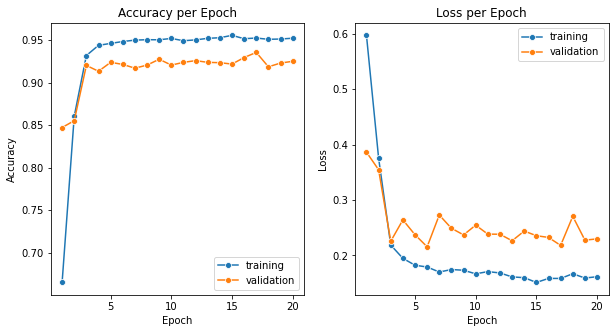

In [22]:
plotLearningCurve(history,len(history.history['loss']))

In [23]:
res = model.evaluate(
    x=test_gen,
    verbose=1,
    steps=TEST_STEPS
)

87/87 [==============================] - 15s 169ms/step - loss: 0.1546 - acc: 0.9557


In [24]:
print('Model Loss on test set: {loss:.4f}'.format(loss = res[0]))
print('Model Accuracy on test set: {accuracy:.4f}'.format(accuracy = res[1]))

Model Loss on test set: 0.1546
Model Accuracy on test set: 0.9557
